# Reccurent Neural Network

# 1. Data Preprocessing

## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

## Importing training data

In [2]:
data_train = pd.read_csv(r'D:\Deep Learning Course\Datasets\Google stock price\Google_Stock_Price_Train.csv')
data_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
# creating numpy array since NN will understand only arrays
# sliceing for only 'Open'  column
train_set = data_train.iloc[:, 1:2].values
train_set.shape

(1258, 1)

## Feature scaling
Normalization is recommended for RNN especially when output neuron has a sigmoid function

In [4]:
sc = MinMaxScaler()
train_set_sc = sc.fit_transform(train_set)
train_set_sc

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

## Creating a data structure
Creating data structure with 60 timesteps and 1 output. Meaning, at each time `t` the RNN will look back at 60 stock prices and based on the this trand it will predict 1 output. For each pretiction `t+1` we will be looking back 3 months data.

In [5]:
# X_train: input to NN, will contain the 60 previous prices for each financial day
# y_train: output, price of next financial day

X_train = []
y_train = []

for i in range(60, train_set.shape[0]):
    
    # 60 previous days before date `ti`
    X_train.append(train_set_sc[i-60:i, 0])
    y_train.append(train_set_sc[i])
    
# converting into array
X_train, y_train = np.array(X_train), np.array(y_train)

In [6]:
# Reshaping
# adding more dimensions to the data i.e. adding no.of predictors.
# These predictors are indicators.Right now only 1 indicator that is `Open`
# if we think there are other indicators we can add them

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# 2. Building RNN

## Initializing RNN

In [7]:
regressor = Sequential()

## Adding first LSTM layer and some Dropout regularisation
Dropout regularisation to avoid overfitting

In [8]:
# units: no.of LSTM memory cells(neurons)
# return_sequences: True if more than 1 LSTM layes

regressor.add(
            LSTM(units = 50, 
                 return_sequences = True, 
                 input_shape = (X_train.shape[1], 1)
                ))

# 20% dropout: 20%=1= neurons will be ignored during each iteration
regressor.add(Dropout(0.2))

## Adding second LSTM layer and some Dropout regularisation

In [9]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

## Adding third LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

## Adding fourth LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

## Adding output layer

In [12]:
regressor.add(Dense(units = 1))

## Compiling the RNN

In [13]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

## Fitting the RNN

In [14]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 13s 27ms/step - loss: 0.0920
Epoch 2/100
38/38 [==============================] - 1s 22ms/step - loss: 0.0072
Epoch 3/100
38/38 [==============================] - 1s 21ms/step - loss: 0.0067
Epoch 4/100
38/38 [==============================] - 1s 21ms/step - loss: 0.0060
Epoch 5/100
38/38 [==============================] - 1s 21ms/step - loss: 0.0060
Epoch 6/100
38/38 [==============================] - 1s 21ms/step - loss: 0.0047: 0s - loss: 0.
Epoch 7/100
38/38 [==============================] - 1s 21ms/step - loss: 0.0051
Epoch 8/100
38/38 [==============================] - 1s 22ms/step - loss: 0.0062
Epoch 9/100
38/38 [==============================] - 1s 22ms/step - loss: 0.0046
Epoch 10/100
38/38 [==============================] - 1s 22ms/step - loss: 0.0048
Epoch 11/100
38/38 [==============================] - 1s 22ms/step - loss: 0.0043
Epoch 12/100
38/38 [==============================] - 1s 22ms/step - loss: 0.0045
Epoch 13/

# 3. Predictions and evaluation

## Getting real stock price data

In [15]:
data_test = pd.read_csv(r'D:\Deep Learning Course\Datasets\Google stock price\Google_Stock_Price_Test.csv')
data_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [16]:
real_stock_price = data_test.iloc[:, 1:2].values
real_stock_price.shape

(20, 1)

## Getting predicted stock price

In [17]:
data_total = pd.concat((data_train['Open'], data_test['Open']), axis = 0)
inputs = data_total[len(data_total) - len(data_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

In [18]:
X_test = []

for i in range(60, real_stock_price.shape[0]+60):
    
    # 60 previous days before date `ti`
    X_test.append(inputs[i-60:i, 0])
    
# converting into array
X_test = np.array(X_test)

# converting into 3D shape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [19]:
pred_stock_price = regressor.predict(X_test)
pred_stock_price = sc.inverse_transform(pred_stock_price)

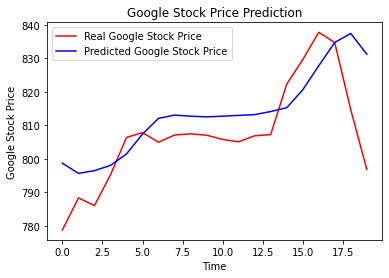

In [20]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(pred_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [21]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

MAPE(real_stock_price, pred_stock_price)

1.1253977873874168